# Assignment 16

In [49]:
# import dependencies
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import numpy as np
import seaborn as sns
import pandas as pd

In [50]:
# define functions
def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [51]:
df = sns.load_dataset('titanic')


# Drop rows with missing values
df = df.dropna()
exampleDataCorrelations = df.corr(numeric_only=True)
exampleDataCorrelations.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

# Display the first few rows of the updated dataset
# df.head()

# irisCorrelations = dataset.corr(numeric_only=True)
# irisCorrelations.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2) # Format the output, precision is the number of decimal places

# df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.00,-0.04,-0.25,0.10,0.02,0.13,-0.58,-0.11
pclass,-0.04,1.00,-0.31,-0.11,0.05,-0.32,-0.12,0.06
age,-0.25,-0.31,1.00,-0.15,-0.27,-0.09,0.34,0.20
sibsp,0.10,-0.11,-0.15,1.00,0.25,0.28,-0.15,-0.63
parch,0.02,0.05,-0.27,0.25,1.00,0.39,-0.18,-0.55
fare,0.13,-0.32,-0.09,0.28,0.39,1.00,-0.11,-0.30
adult_male,-0.58,-0.12,0.34,-0.15,-0.18,-0.11,1.00,0.19
alone,-0.11,0.06,0.20,-0.63,-0.55,-0.30,0.19,1.00


In [52]:
# split dataset
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df['who'])
# print(dataset_train.shape, dataset_test.shape)

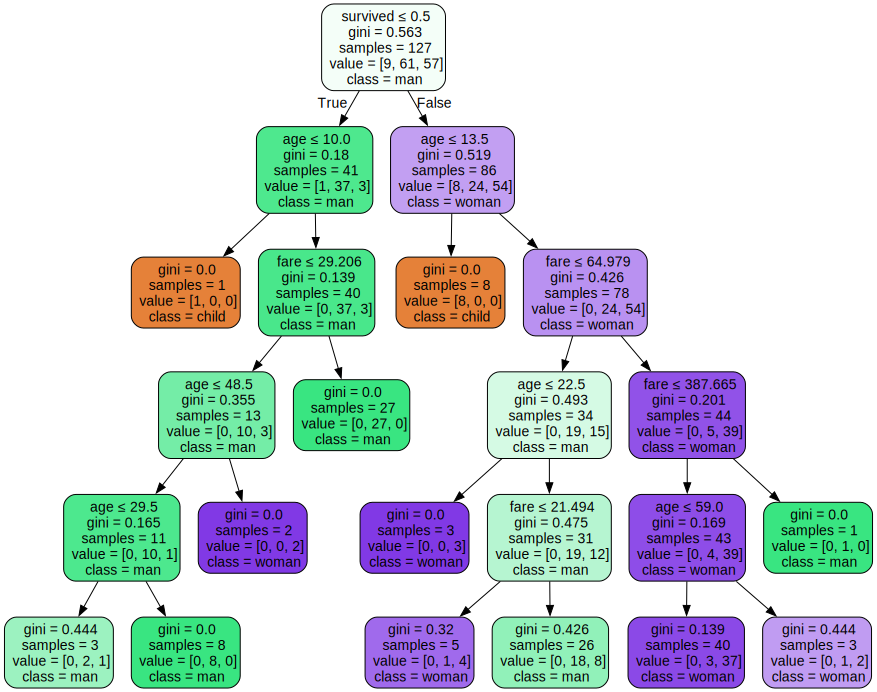

In [53]:
# create decisiontree
features= ['fare', 'age', 'survived']
dt_classification = DecisionTreeClassifier(max_depth = 5) # Increase max_depth to see effect in the plot
dt_classification.fit(df_train[features], df_train['who'])

plot_tree_classification(dt_classification, features, np.sort(df.who.unique()))


In [54]:
# calculate accuracy of model predictions
predictionsOnTrainset = dt_classification.predict(df_train[features])
predictionsOnTestset = dt_classification.predict(df_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, df_train.who)
accuracyTest = calculate_accuracy(predictionsOnTestset, df_test.who)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.889763779527559
Accuracy on test set 0.7272727272727273


## Conclusion
There is about a 10% difference in accuracy between the training and test sets when using a tree depth of 5. Increasing the depth to 6 does not significantly improve training accuracy, but it causes the test accuracy to decrease, indicating overfitting. Therefore, a maximum depth of 5 provides a good balance between model complexity and generalization, making it the optimal choice for this dataset.